In [ ]:
# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" 
# and others are "Good"

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# divide the data 
from sklearn.model_selection import KFold,cross_val_score


# label Encoder
from sklearn.preprocessing import LabelEncoder

In [3]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

#######   Ensemble Technique    #######

# for Bagging
from sklearn.ensemble import BaggingClassifier

# for Random Forest
from sklearn.ensemble import RandomForestClassifier

# for Boosting 
from sklearn.ensemble import AdaBoostClassifier

#for voting 
from sklearn.ensemble import VotingClassifier


In [4]:
import warnings
warnings.filterwarnings('ignore')

## Preprocessing the Data

In [5]:
fraud = pd.read_csv('Fraud_check.csv')

In [6]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
label_encode = LabelEncoder()

for i in fraud.columns:
    if fraud[i].dtype == object:
        fraud[i] = label_encode.fit_transform(fraud[i])
    else:
        pass
    
# fraud['Undergrad'] = label_encode.fit_transform(fraud['Undergrad'])
# fraud['Marital.Status'] = label_encode.fit_transform(fraud['Marital.Status'])
# fraud['Urban'] = label_encode.fit_transform(fraud['Urban'])

In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [ ]:
# no need to normalize data

In [10]:
len(fraud['Taxable.Income'].unique())

599

In [ ]:
# Taxable.Income  is continous in nature - converting it in categorical

In [11]:
fraud['income']='<=30000'

fraud.loc[fraud['Taxable.Income']>30000,'income'] ='Good'
fraud.loc[fraud['Taxable.Income']<=30000,'income'] = 'Risky'

In [12]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [13]:
fraud.drop('Taxable.Income',axis=1,inplace=True)

In [14]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [15]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int32 
 1   Marital.Status   600 non-null    int32 
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    int32 
 5   income           600 non-null    object
dtypes: int32(3), int64(2), object(1)
memory usage: 21.2+ KB


In [16]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
income             0
dtype: int64

In [17]:
fraud[fraud.duplicated()].shape

(0, 6)

In [ ]:
# no duplicates # no missing values

<AxesSubplot:>

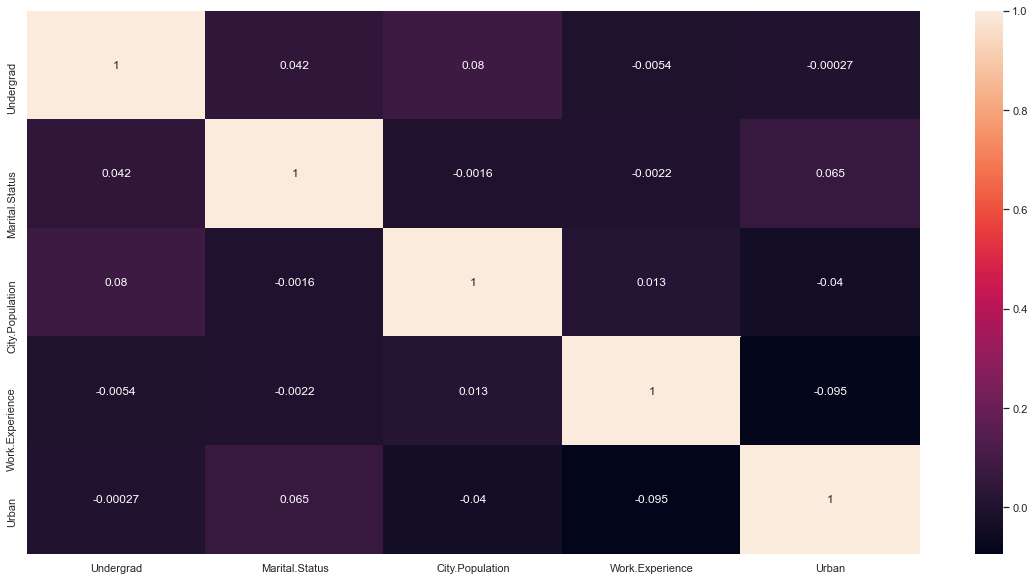

In [18]:
# All other variables are independent

plt.figure(figsize=(20,10))
sns.heatmap(fraud.corr(),annot=True)

In [19]:
x = fraud.iloc[:,0:5]
y = fraud.iloc[:,5]

In [20]:
# spliting the data

kfold = KFold(n_splits=10)

In [21]:
# creating the decision Tree Model - Base Model - On Top of it we create Bagging,Random Forest

d_tree = DecisionTreeClassifier()

## Random Forest 

In [22]:
# Model Structure
n_trees = 100
model_rf = RandomForestClassifier(n_estimators=n_trees,max_features=2,random_state=8)


In [23]:
# Accuracy of All the Models - 10 DT Model
result_rf = cross_val_score(model_rf,x,y,cv=kfold)
result_rf

array([0.76666667, 0.75      , 0.68333333, 0.7       , 0.73333333,
       0.63333333, 0.88333333, 0.68333333, 0.76666667, 0.83333333])

In [30]:
# mean Accuracy of Model

print(f'mean Accuracy of Model is {np.round(result_rf.mean(),4)*100} %')

mean Accuracy of Model is 74.33 %


## Bagging

In [25]:
# Model Structure
n_trees = 100
model_bag = BaggingClassifier(base_estimator=d_tree,n_estimators=n_trees,random_state=8)

In [26]:
# Accuracy of All the Models - 10 DT Model
result_bag = cross_val_score(model_bag,x,y,cv=kfold)
result_bag

array([0.76666667, 0.73333333, 0.66666667, 0.71666667, 0.75      ,
       0.63333333, 0.8       , 0.71666667, 0.71666667, 0.83333333])

In [29]:
# mean Accuracy of Model

print(f'mean Accuracy of Model is {np.round(result_bag.mean(),4)*100} %')

mean Accuracy of Model is 73.33 %


## Stacking

In [31]:
estimators = []

estimators.append(('Decision Tree',d_tree))

estimators.append(('Random Forest',model_rf))

estimators.append(('Bagging',model_bag))

In [32]:
# create the ensemble model
ensembel = VotingClassifier(estimators= estimators)

In [33]:
# finding the accuracy

result_voting = cross_val_score(ensembel,x,y,cv=kfold)

In [34]:
print(f'mean Accuracy of Model is {np.round(result_voting.mean(),4)*100} %')

mean Accuracy of Model is 73.33 %
